# ML Model for Predicting Parkinson Patients

## Breif Description about Problem Statment and its Solution
The Machine Learning model which is presented in this notebook is for detecting patients with Parkinson disease.
I have used the data set from `UCI Machine Learning Repository`.

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals (`name` column). In this dataset the targeted values in given in `status column`, according to `status column` **0 indicates healthy** and **1 indicates Parkinson patient**.


The process for creating the ML model is breifly explained in the ste

- **Step1:** `Reading dataset`
    - In the first step we will read the dataset which is stored in `parkinsons.data` file. For reading the dataset we will use `pandas` library.  
    

- **Step2:** `Data Cleaning`
    - Now after step 1, we will explore the dataset to find if that dataset has any missing values or not, missing values in the dataset decreases the accuracy of the model and also makes it worse. And after that we will split our features and target label (class column) for the dataset, in our case `status` is the column in which target labels/ classses exits so that's why we will split this column from features.


- **Step3:** `Feature Analysis`
    - In this step we will use correlation analysis to analyze all the features which are given in the dataset. Then on the basis of correlation analysis result we will remove the columns with less score. And after that we will also remove `name` column because `name` colun just contains the name or id of the patient and that is not useful to predict any value. 
  
  
- **Step4:** `Data Transformation`
    - Now we will split the data into two subsets `Training` and `Testing`, we will take **20%** as testing data and **80%** as training data. Now we have two subsets of dataset, we know that Neural Networks accepts only vectors as input, so for this purpose we will transform our data into vector form by using `numpy` library. 
    
    
- **Step5:** `Neural Network`
    - In this step we will implement `Neural Network`, in the steps given below I have defined the steps which are required to define and train the neural network model:
    - We will define a `Neural Network` architecture which we will use to detect healthy/sick patients.
    - We will use `cross validation` technique to prevent overfitting.
    - We will also use `Dropout Layers`, this method also prevents overfitting.
    - After all these steps we will train and test the model.
    
    
- **Step6:** `Saving information`
    - In the last step we will need to save some of the information in files. We will store the `Neural Network model` and `weights` of the model, by the help of this step we don't need t train the model again and again for usage, we will just read the trainned model from the file and it will predict results for us.
    
    
So lets get started with the project step by step!
    

---
## Importing Libraries
In the cell given below we will import all the libraries which will be used in this notebook.

- **pandas:** For reading datasets, and used for manipulation of dataframes.
- **numpy:** For converting dataframe into vector arrays (used by Neural Networks).
- **seaborn:** Visualization Library.
- **maplotlib:** Visualization Library.
- **sklearn:** ML library, used for spliting the training and testing set.
- **IPython:** Library for visualizing dataframes
- **keras:** Library for Neural Netowrks

In [75]:
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.models import model_from_json
import os

%matplotlib inline

np.random.seed(42)

---
## Reading Dataset
In the first step we will read the dataset with the help of pandas library function `.read_csv()`, this function takes one parameter and that is the file name which we want to read. And after that we will display the dataframe.

In [76]:
data = pd.read_csv('parkinsons.data')

data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


---
## Data Cleaning 
For this step we will first calculate the `Missing values percentage` for each column. For calculating the missing percentage we will be using pandas library function `.isnull()`, this function returns the missing values in decimel point like `0.34` or `0.03` so for converting it into percentage we will use this expression `.sum()*100/len(data)`, in this expression we are calculating the sum of the missing entires then multiplying it with 100 and after that dividing it with the total number of rows, so in this way we can get the perccentage of each column. And then we will display the missing percentage of each feature

In [118]:
#Spliting features and labels
missing_percentage = data.isnull().sum()*100/len(data)

print("Missing values in percentage: \n")
for miss, col in zip(missing_percentage, data.columns):
    print(col,": %.2f%%"%miss)

Missing values in percentage: 

name : 0.00%
MDVP:Fo(Hz) : 0.00%
MDVP:Fhi(Hz) : 0.00%
MDVP:Flo(Hz) : 0.00%
MDVP:Jitter(%) : 0.00%
MDVP:Jitter(Abs) : 0.00%
MDVP:RAP : 0.00%
MDVP:PPQ : 0.00%
Jitter:DDP : 0.00%
MDVP:Shimmer : 0.00%
MDVP:Shimmer(dB) : 0.00%
Shimmer:APQ3 : 0.00%
Shimmer:APQ5 : 0.00%
MDVP:APQ : 0.00%
Shimmer:DDA : 0.00%
NHR : 0.00%
HNR : 0.00%
status : 0.00%
RPDE : 0.00%
DFA : 0.00%
spread1 : 0.00%
spread2 : 0.00%
D2 : 0.00%
PPE : 0.00%


### Spliting Features and Labels 
We know we don't have any missing values in the dataset which is good, because if we had some missing entries in the dataset then we have 2 option fo that, use a technique to fill up the missing entries or delete the missing entries, both have their pros and cons. 

So, now we will split the dataset into features and labels, as variable name suggests, `features` variable will store all the features and the `label` variable will store the labels.

In [77]:
# status 1 = sick, 0 = healthy
features = data.drop('status', axis=1)
label = data["status"]

features

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


---
## Feature Analysis
Now after cleaning all the dataset we will do feature analysis and for that purpose we will use correlation analysis. 

### Correlation Analysis
Correlation analysis is use to find the associations between variables.The correlation coefficient is measured on a scale that varies from + 1 through 0 to - 1. Complete correlation between two variables is expressed by either + 1 or -1. When one variable increases as the other increases the correlation is positive; when one decreases as the other increases it is negative. Complete absence of correlation is represented by 0.

We are using pandas to calulate the correlation of a dataset, pandas function `.corr()` is used to calculate the correlation between features. There are 3 methods which can be used to calculate the correlation between features. we are using the `pearson method`, other two methods are `kendall` and `spearman`.

In [79]:
corr_analysis = features.corr(method="pearson")
corr_analysis

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.077774,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,0.004937,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.107293,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.758255,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.648793,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.737455,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.804139,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.737439,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.950083,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.960977,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


## Plotting heatmap
The cell below will generate the heatmap for the corrleation analysis, this will helps us in visualizing the results. For plotting the heatmap we will be using `Seaborn` library function `.heatmap()`, this function takes the information about the correlation analysis and heat map colour is given in `cmap` parameter.

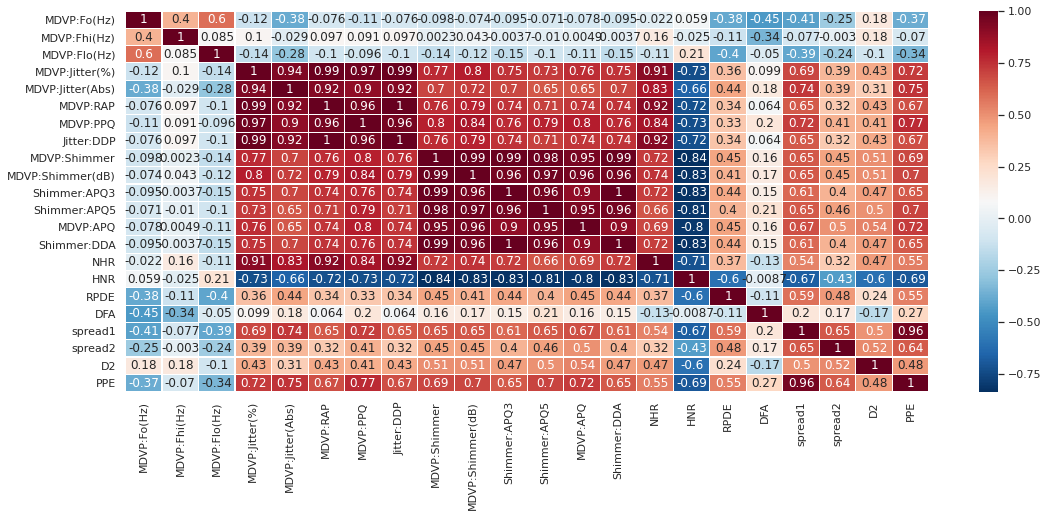

In [80]:
sb.set(rc={"figure.figsize":(18, 7)})
sb.heatmap(corr_analysis, 
            xticklabels=corr_analysis.columns,
            yticklabels=corr_analysis.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.1)

In the heatmap abve the `red` points shows the high corrleation score for columns with each other while the `blue` points shows the low corrleation score for columns with each other. In the heatmap we can easily tell that which columns have score with others and so in that case we will drop the columns with less score, we will drop `MDVP:Fo(Hz)`, `MDVP:Fhi(Hz)`, `MDVP:Flo(Hz)`, `HNR`, `DFA` , `spread1` columns and you can notice that we are also deleting the `name` column from features, the `name` column does not contribute much in predicting the sick or healthy pateints becuase it only contains the constant values of id, that's why I'm deleting the column to get better results.

In [81]:
features = features.drop("name", axis=1)
features = features.drop(["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", 
                          "HNR", "DFA" , "spread1"], axis=1)

---
## Data Transformation
### Spliting the dataset into Training and Testing
For spiliting our data into training and testing subsets we will use the function `train_test_split()` provided by `sklearn`. In this function we have to set the `test_size` and `random_state`. We will be setting `test_size to 30%` and `random_state = 2`. By the help of random state parameter the function will first shuffle the dataset and then split it into training and testing. Shuffling of dataset is a good paractice by the help of this we can generalize the model, and in that way model will performs better in testing.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(features, label, 
                                                    test_size=0.3, random_state=2)

print("Number of training samples is", len(X_train))
display(X_train[:10])
print("Number of testing samples is", len(X_test))
display(X_test[:10])

Number of training samples is 136


,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,RPDE,spread2,D2,PPE
71,0.00971,0.00007,0.00534,0.00478,0.01601,0.04978,0.483,0.02749,0.02466,0.03736,0.08247,0.03361,0.543299,0.224852,2.642276,0.242981
42,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,0.164,0.01035,0.01024,0.01133,0.03104,0.00740,0.305062,0.098648,2.416838,0.095032
65,0.00238,0.00001,0.00136,0.00140,0.00408,0.01745,0.154,0.00942,0.01160,0.01234,0.02827,0.00420,0.305429,0.006274,2.118596,0.091546
134,0.00589,0.00006,0.00291,0.00319,0.00873,0.04932,0.441,0.02683,0.03112,0.03651,0.08050,0.03031,0.637814,0.320385,2.375138,0.243080
113,0.00534,0.00003,0.00321,0.00280,0.00964,0.01680,0.149,0.00861,0.01017,0.01301,0.02583,0.00620,0.441097,0.250283,2.489191,0.177807
169,0.00517,0.00002,0.00316,0.00283,0.00949,0.02018,0.212,0.01176,0.01191,0.01344,0.03529,0.00965,0.371837,0.073298,2.266432,0.100881
188,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,0.106,0.00557,0.00721,0.01095,0.01672,0.00703,0.555303,0.149694,1.913990,0.121777
106,0.00168,0.00001,0.00068,0.00092,0.00204,0.01064,0.097,0.00522,0.00632,0.00928,0.01567,0.00233,0.334171,0.184550,2.129924,0.106802
139,0.00381,0.00003,0.00181,0.00232,0.00542,0.03026,0.267,0.01514,0.01812,0.02770,0.04543,0.01827,0.624811,0.233070,2.445646,0.184985
131,0.00407,0.00003,0.00224,0.00205,0.00671,0.01516,0.138,0.00721,0.00815,0.01310,0.02164,0.01015,0.468621,0.217013,2.527742,0.170633


Number of testing samples is 59


,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,RPDE,spread2,D2,PPE
10,0.00505,0.00006,0.00254,0.00330,0.00763,0.02143,0.197,0.01079,0.01342,0.01892,0.03237,0.01166,0.611137,0.391002,2.407313,0.249740
79,0.01038,0.00010,0.00622,0.00576,0.01865,0.03121,0.361,0.01773,0.01783,0.02139,0.05320,0.02220,0.594387,0.265699,2.398422,0.277948
164,0.00907,0.00009,0.00493,0.00461,0.01480,0.02814,0.272,0.01579,0.01553,0.02073,0.04736,0.03882,0.671378,0.396746,2.560422,0.367233
142,0.00376,0.00002,0.00182,0.00215,0.00546,0.03527,0.297,0.02055,0.02076,0.02530,0.06165,0.01728,0.606273,0.310746,2.465528,0.209863
186,0.00496,0.00004,0.00254,0.00263,0.00762,0.01660,0.154,0.00820,0.00972,0.01491,0.02460,0.01397,0.566424,0.153310,2.161936,0.120605
133,0.00331,0.00003,0.00168,0.00171,0.00504,0.01043,0.099,0.00490,0.00621,0.00903,0.01471,0.00504,0.482296,0.178713,2.034827,0.141422
35,0.00198,0.00001,0.00105,0.00115,0.00314,0.01194,0.107,0.00586,0.00760,0.00957,0.01758,0.00135,0.344252,0.170183,2.447064,0.057610
137,0.00502,0.00004,0.00257,0.00312,0.00772,0.05279,0.476,0.02896,0.03347,0.04134,0.08689,0.03690,0.625362,0.304107,2.672362,0.274387
25,0.00633,0.00006,0.00316,0.00375,0.00948,0.03767,0.381,0.01732,0.02245,0.03780,0.05197,0.02887,0.522746,0.236853,2.846369,0.219514
2,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,0.429895,0.311173,2.342259,0.332634


## Converting the dataframe into vectors array
For feeding our data into Neural Network, we first have to convert the dataset into array of vectors. Note that Neural Networks only accepts vectors as input.

For the conversion we will be using `np.array()` function. Features will be directly converted to vectors and for labels/classes we just have to do one more step. Note that we have 2 classes in our dataset `Sick`=>`1` and `Healthy`=>`0`, so the output layer of the Neural Network will also have two nodes, one for 0 and the other for 1. So for this purpose we will first convert each label/class into categorical data and then we will convert them into the vectors. For converting into categorical data we will use `Keras` function `keras.utils.to_categorical()`, this function takes two parameters first one is the dataframe of the labels and the second one is the number of classes we have in our dataset in our case we have passed `2`. The categorical function will return an array like these for each class:
   
- [1. 0.] refers to class/label `0`
- [0. 1.] refers to class/label `1`
 

In [83]:
X_train = np.array(X_train)
y_train = np.array(keras.utils.to_categorical(y_train, 2))
X_test = np.array(X_test)
y_test = np.array(keras.utils.to_categorical(y_test, 2))

print(X_train[:10])
print(y_train[:10])

[[9.710000e-03 7.000000e-05 5.340000e-03 4.780000e-03 1.601000e-02
  4.978000e-02 4.830000e-01 2.749000e-02 2.466000e-02 3.736000e-02
  8.247000e-02 3.361000e-02 5.432990e-01 2.248520e-01 2.642276e+00
  2.429810e-01]
 [2.980000e-03 1.000000e-05 1.690000e-03 1.820000e-03 5.070000e-03
  1.752000e-02 1.640000e-01 1.035000e-02 1.024000e-02 1.133000e-02
  3.104000e-02 7.400000e-03 3.050620e-01 9.864800e-02 2.416838e+00
  9.503200e-02]
 [2.380000e-03 1.000000e-05 1.360000e-03 1.400000e-03 4.080000e-03
  1.745000e-02 1.540000e-01 9.420000e-03 1.160000e-02 1.234000e-02
  2.827000e-02 4.200000e-03 3.054290e-01 6.274000e-03 2.118596e+00
  9.154600e-02]
 [5.890000e-03 6.000000e-05 2.910000e-03 3.190000e-03 8.730000e-03
  4.932000e-02 4.410000e-01 2.683000e-02 3.112000e-02 3.651000e-02
  8.050000e-02 3.031000e-02 6.378140e-01 3.203850e-01 2.375138e+00
  2.430800e-01]
 [5.340000e-03 3.000000e-05 3.210000e-03 2.800000e-03 9.640000e-03
  1.680000e-02 1.490000e-01 8.610000e-03 1.017000e-02 1.301000e-0

---
## Building Neural Network Architecture
In the cell below we have defined the architecture for Neural Network.

- **Sequential()**: This class is provided by Keras, by the help of this class we will initialize our Neural network Model.

- **add()**: This `add` function will add a layer in the Neural Network.

- **Dense()**: This is the layer class, by the help of `Dense` class we initialize a layer, it takes following parameters:
    - **Number of Nodes**: First parameter refer to the number of nodes that the layer will have
    - **activation**: This refers to the activation function for the nodes in the layer, for input and hidden layers we will be using `relu` activation function aka **Rectified Linear Unit** function and `tanh` activation function aka **tangent hyperbolic**, and for the output layer we will be using `softmax` becuase we have two classes in our dataset.
    - **input_shape**: This parameter will be given only in the first layer of the Netowrk. This refers to the number of columns the dataset have, so then the model will know how many input parameters it will have to take from the dataset.

- **Dropout**: This function prevents overfitting in the model. This is basically the percentage of nodes in the layer that will be randomly swtiched off while computation.

- **Compile**: This will compile our defined architecutre and check for any potential errors. It takes following parameters.
    - **loss**: We have to define a loss function, there are many loss functions provided by keras but we will be using `categorical_crossentropy`.
    - **optimizer**: For optimizer function we will be using `adamax`
    - **metrics**: We want our metrics into accuracy, so that's why we have selected accuracy.
    
- **Summary()**: This will output the compiled model summary for us. 

In [109]:
# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(features.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_45 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_46 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 2)                 66        
Total params: 1,666
Trainable params: 1,666
Non-trainable params: 0
_________________________________________________________________


## Training the Model with Cross Validation
We will be training our model with cross validation so then we can have the best results and also it will prevent our model from overfitting. We will also save the best weights of the model so then when we train the model next time it will not use the random weights rather than it will use the previous saved one.

For saving the weights we will be using `callback` function `ModelCheckpoint` provided by `Keras`. We have taken 20% of the data as our validation set. 

`Epochs` are the number of iterations the model did, for Neural Network it will be Number of propagations (Forward and Bakward) in our case it will propagate 15 times forward and backward


In [110]:
# Training the model with validation set
from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.mode.best.hdf5', verbose=1, 
                               save_best_only=True)

hist = model.fit(X_train, y_train, epochs=300, validation_split=0.2, verbose=0, 
                 shuffle=True, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.68508, saving model to model.mode.best.hdf5

Epoch 00002: val_loss did not improve from 0.68508

Epoch 00003: val_loss did not improve from 0.68508

Epoch 00004: val_loss did not improve from 0.68508

Epoch 00005: val_loss did not improve from 0.68508

Epoch 00006: val_loss did not improve from 0.68508

Epoch 00007: val_loss did not improve from 0.68508

Epoch 00008: val_loss did not improve from 0.68508

Epoch 00009: val_loss did not improve from 0.68508

Epoch 00010: val_loss did not improve from 0.68508

Epoch 00011: val_loss did not improve from 0.68508

Epoch 00012: val_loss did not improve from 0.68508

Epoch 00013: val_loss did not improve from 0.68508

Epoch 00014: val_loss improved from 0.68508 to 0.68300, saving model to model.mode.best.hdf5

Epoch 00015: val_loss did not improve from 0.68300

Epoch 00016: val_loss did not improve from 0.68300

Epoch 00017: val_loss did not improve from 0.68300

Epoch 00018: val_loss did not impro


Epoch 00125: val_loss improved from 0.63030 to 0.62981, saving model to model.mode.best.hdf5

Epoch 00126: val_loss improved from 0.62981 to 0.62899, saving model to model.mode.best.hdf5

Epoch 00127: val_loss improved from 0.62899 to 0.62814, saving model to model.mode.best.hdf5

Epoch 00128: val_loss improved from 0.62814 to 0.62805, saving model to model.mode.best.hdf5

Epoch 00129: val_loss improved from 0.62805 to 0.62798, saving model to model.mode.best.hdf5

Epoch 00130: val_loss improved from 0.62798 to 0.62762, saving model to model.mode.best.hdf5

Epoch 00131: val_loss improved from 0.62762 to 0.62601, saving model to model.mode.best.hdf5

Epoch 00132: val_loss improved from 0.62601 to 0.62591, saving model to model.mode.best.hdf5

Epoch 00133: val_loss did not improve from 0.62591

Epoch 00134: val_loss did not improve from 0.62591

Epoch 00135: val_loss did not improve from 0.62591

Epoch 00136: val_loss did not improve from 0.62591

Epoch 00137: val_loss did not improve f


Epoch 00239: val_loss improved from 0.56139 to 0.56092, saving model to model.mode.best.hdf5

Epoch 00240: val_loss improved from 0.56092 to 0.56013, saving model to model.mode.best.hdf5

Epoch 00241: val_loss improved from 0.56013 to 0.55951, saving model to model.mode.best.hdf5

Epoch 00242: val_loss improved from 0.55951 to 0.55854, saving model to model.mode.best.hdf5

Epoch 00243: val_loss improved from 0.55854 to 0.55736, saving model to model.mode.best.hdf5

Epoch 00244: val_loss did not improve from 0.55736

Epoch 00245: val_loss did not improve from 0.55736

Epoch 00246: val_loss did not improve from 0.55736

Epoch 00247: val_loss did not improve from 0.55736

Epoch 00248: val_loss did not improve from 0.55736

Epoch 00249: val_loss did not improve from 0.55736

Epoch 00250: val_loss did not improve from 0.55736

Epoch 00251: val_loss did not improve from 0.55736

Epoch 00252: val_loss did not improve from 0.55736

Epoch 00253: val_loss did not improve from 0.55736

Epoch 002

In [111]:
training_score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", training_score[1])
testing_score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", testing_score[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8235

 Training Accuracy: 0.8235294222831726
2/2 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8136

 Testing Accuracy: 0.8135592937469482


## Visualizing Model Loss
In the cells below we will plot the graph for model's loss function. For ploting graphs we are using matplotlib and in simple lines of code we will get the graph.

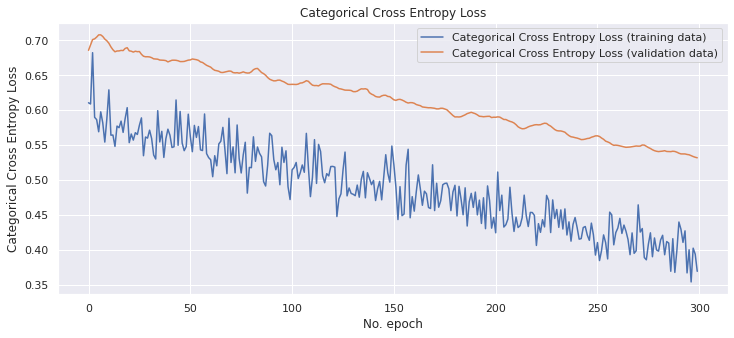

In [116]:
# Plot history: MAE
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.plot(hist.history['loss'], label='Categorical Cross Entropy Loss (training data)')
plt.plot(hist.history['val_loss'], label='Categorical Cross Entropy Loss (validation data)')
plt.title('Categorical Cross Entropy Loss')
plt.ylabel('Categorical Cross Entropy Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

## Saving Data in Files
Now in the last part of this file we will be saving important information so that it can be used in data presentation section of the project, we will be saving following things

- **Trained Model**: We will convert the model into json and then save that in the file with the trained weights. For converting and saving the model we will be using `keras` function `.to_json()` which will convert the model into json and by simple file saving techniques we will save both weights and trained model in different files

In [74]:
# Saving the model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model-weights.h5")
print("Saved model to disk")

Saved model to disk
